In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [5]:
data = pd.read_csv('rainfall in india 1901-2015.csv')
data = data.drop(['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec'], axis=1)
data.drop(data.index[0], inplace=True)
data.head()
data = data[data['SUBDIVISION']=='TELANGANA']
# data = data.dropna
data.drop(['SUBDIVISION'], axis=1, inplace=True)
data

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
3197,1901,6.9,41.8,7.8,45.2,22.0,123.6,237.8,177.2,77.7,75.5,12.2,0.0,827.7
3198,1902,0.0,0.0,0.2,10.7,7.3,52.4,146.3,142.8,190.5,41.7,31.2,7.3,630.4
3199,1903,12.9,4.6,0.0,9.9,40.7,99.2,505.2,246.7,191.9,155.8,15.5,1.1,1283.4
3200,1904,0.0,0.0,10.8,0.8,14.7,104.2,139.5,50.0,162.3,44.4,0.0,0.0,526.7
3201,1905,0.0,4.3,12.8,27.6,32.2,129.5,82.4,237.3,179.1,19.6,0.0,0.0,724.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2011,0.0,11.9,2.6,25.6,9.3,83.9,268.2,225.9,107.6,13.9,4.2,0.0,753.1
3308,2012,6.7,0.0,0.2,14.0,8.4,124.4,300.3,229.9,202.4,83.6,38.7,0.0,1008.6
3309,2013,2.4,29.0,0.2,24.4,8.5,213.4,453.8,230.6,161.4,205.9,16.4,2.7,1348.7
3310,2014,0.2,2.9,58.3,10.3,73.3,62.3,146.0,205.2,146.8,29.6,10.8,0.7,746.4


In [6]:
prior_data = data[data['YEAR']<=1980]
likelihood_data = data[data['YEAR']>1980]

prior_data.iloc[:, 1:]

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
3197,6.9,41.8,7.8,45.2,22.0,123.6,237.8,177.2,77.7,75.5,12.2,0.0,827.7
3198,0.0,0.0,0.2,10.7,7.3,52.4,146.3,142.8,190.5,41.7,31.2,7.3,630.4
3199,12.9,4.6,0.0,9.9,40.7,99.2,505.2,246.7,191.9,155.8,15.5,1.1,1283.4
3200,0.0,0.0,10.8,0.8,14.7,104.2,139.5,50.0,162.3,44.4,0.0,0.0,526.7
3201,0.0,4.3,12.8,27.6,32.2,129.5,82.4,237.3,179.1,19.6,0.0,0.0,724.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,0.2,0.0,1.0,25.6,10.7,85.7,471.7,277.3,123.4,5.6,34.5,0.0,1035.6
3273,0.0,0.0,2.4,8.0,42.3,97.4,253.1,240.0,70.9,51.0,36.7,6.7,808.6
3274,30.7,19.1,5.9,20.6,23.0,261.6,376.5,376.7,116.0,50.1,31.6,0.0,1311.7
3275,9.8,22.8,1.2,12.6,48.7,145.9,156.4,131.8,200.0,15.7,39.5,7.3,791.7


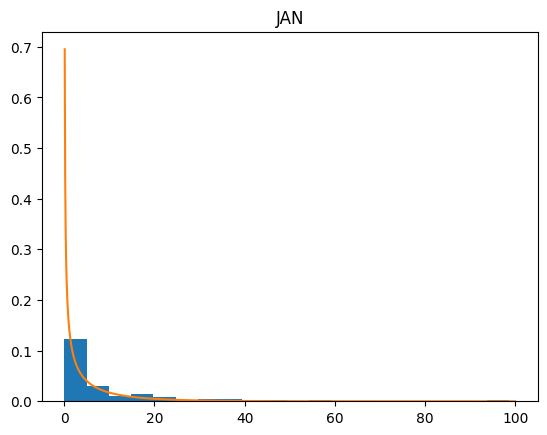

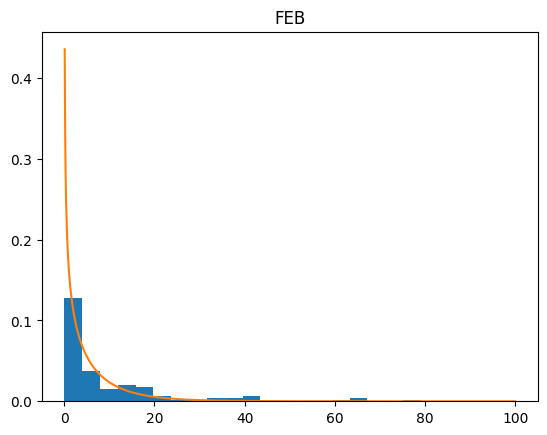

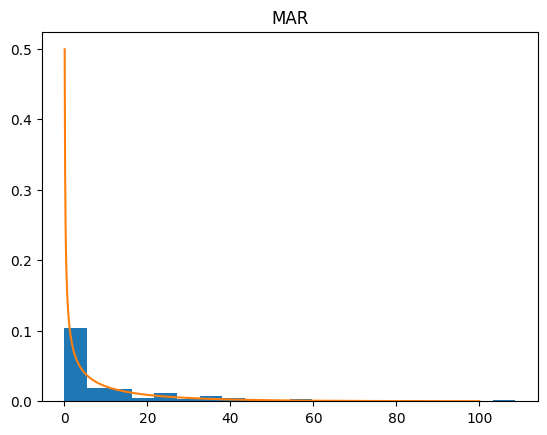

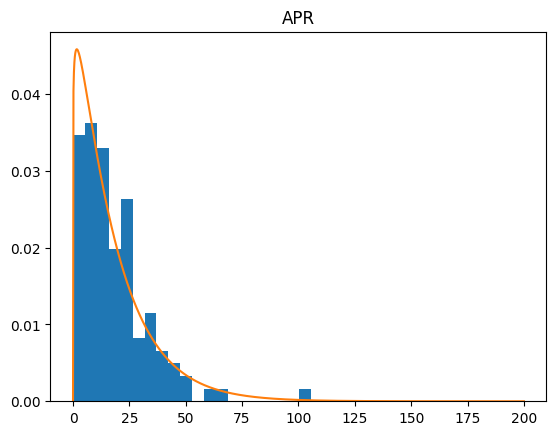

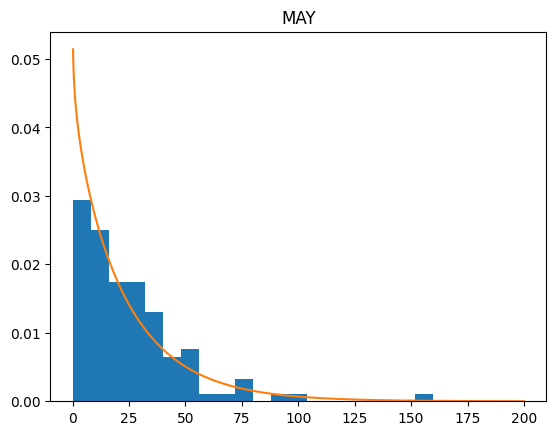

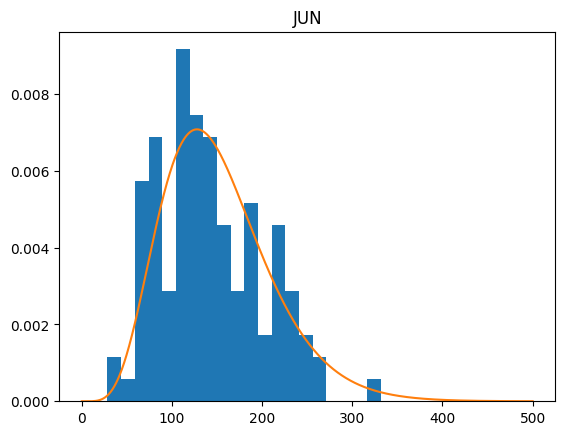

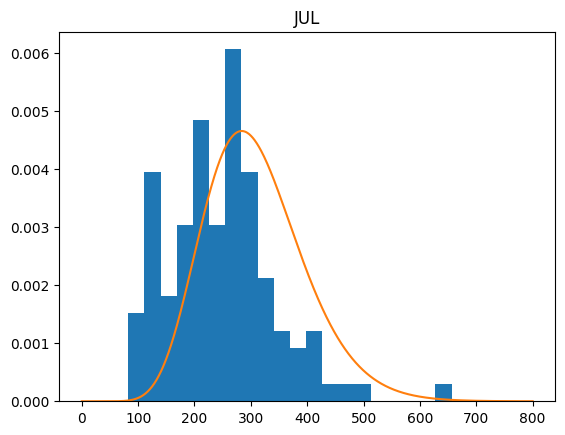

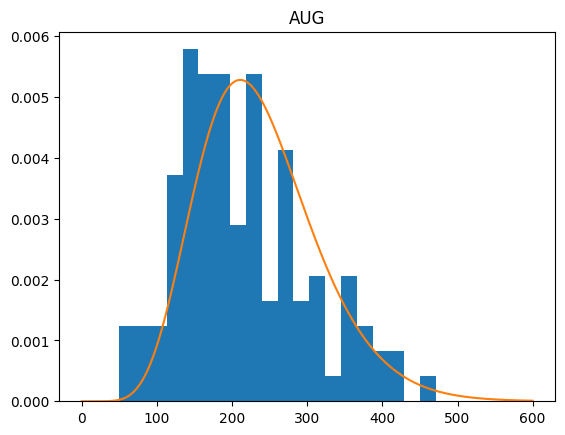

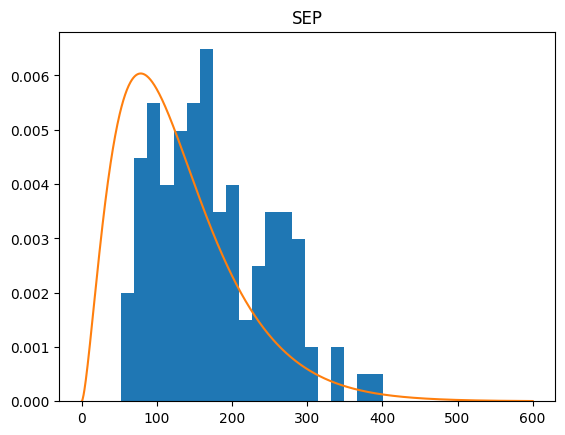

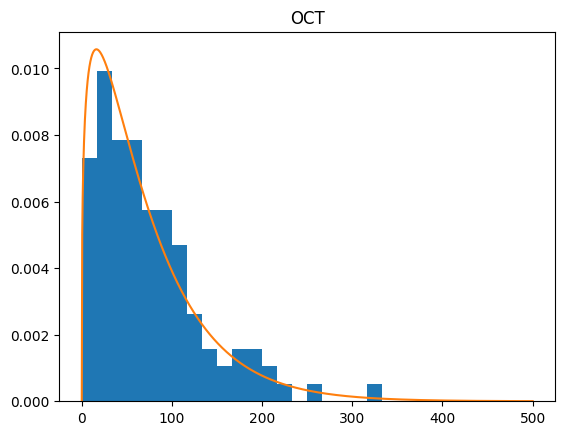

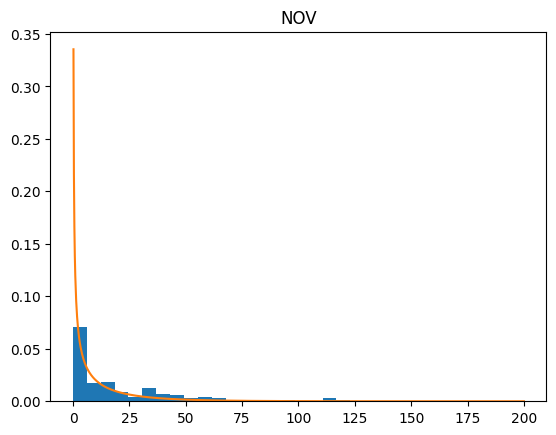

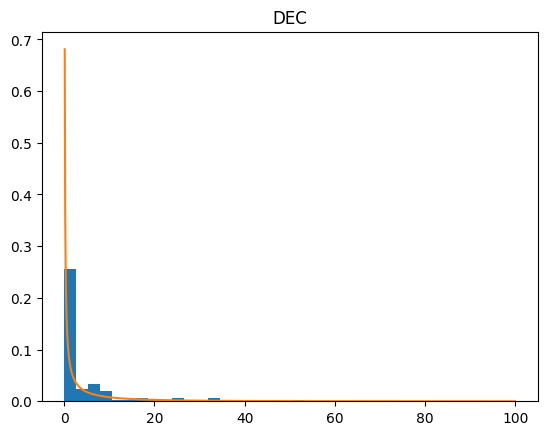

In [9]:
# fitting a gamma distribution to the data for each month
alpha = []
beta = []

start = [0,0,0,0,0, 75, 100, 100, 50,0,0,0]
end = [25, 25, 25, 50, 50, 200, 300, 300, 200,100, 30, 50]
endk = [100, 100, 100, 200, 200, 500, 800, 600, 600,500, 200, 100]

for i in range(1,13):
    alpha.append(stats.gamma.fit(prior_data.iloc[:, i])[0])
    beta.append(stats.gamma.fit(prior_data.iloc[:, i])[2])

# f = open('../Project_2/prior.txt', 'w')

# for i in range(1,13):
#     f.write("Alpha and Beta for month "+str(data.columns[i])+" are "+str(np.round(alpha[i-1],2))+" and "+str(np.round(beta[i-1],2))+" respectively \n")

# plotting the fitted gamma distribution
for i in range(1,13):
    plt.figure()
    plt.hist(data.iloc[:,i], bins=20, density=True)
    plt.plot(np.linspace(0, endk[i-1], 1000), stats.gamma.pdf(np.linspace(0, endk[i-1], 1000), alpha[i-1], scale=beta[i-1]))
    plt.title(data.columns[i])
    plt.show()
    # plt.savefig('../Project_2/prior_graphs/'+data.columns[i]+'.png')
    # plt.close()

# f.write("The mean and standard deviation for each month are: \n")

# for i in range(1,13):
#     f.write("Month "+str(data.columns[i])+" : "+str(np.round(stats.gamma.mean(alpha[i-1], scale=beta[i-1]),2))+" and "+str(np.round(stats.gamma.std(alpha[i-1], scale=beta[i-1]),2))+" respectively \n")

# #95% confidence interval
# f.write("The 95% confidence interval for each month is: \n")

# for i in range(1,13):
#     f.write("Month "+str(data.columns[i])+" : "+str(np.round(stats.gamma.interval(0.95, alpha[i-1], scale=beta[i-1])[0],2))+" and "+str(np.round(stats.gamma.interval(0.95, alpha[i-1], scale=beta[i-1])[1],2))+" respectively \n")


In [10]:
n = 35

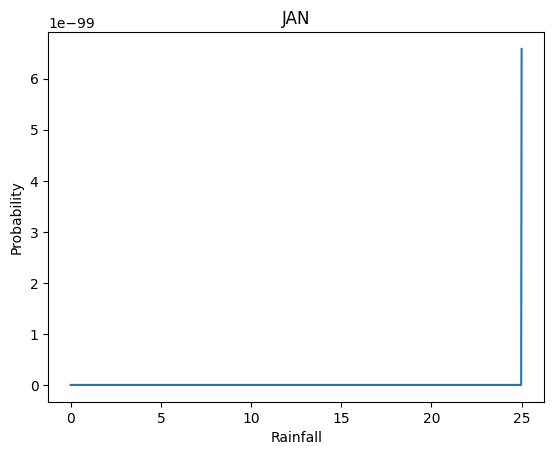

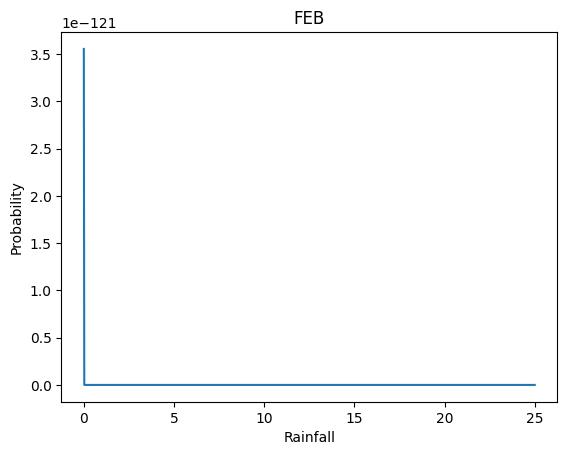

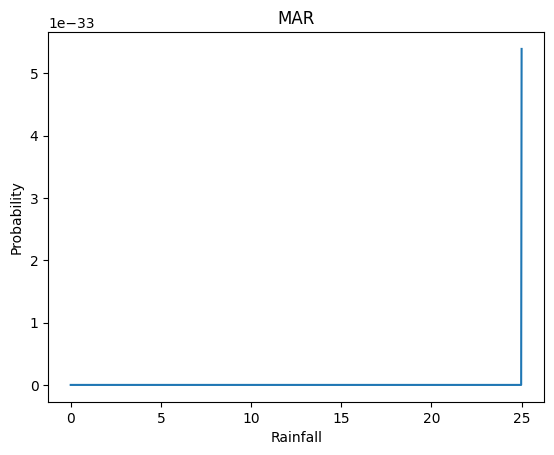

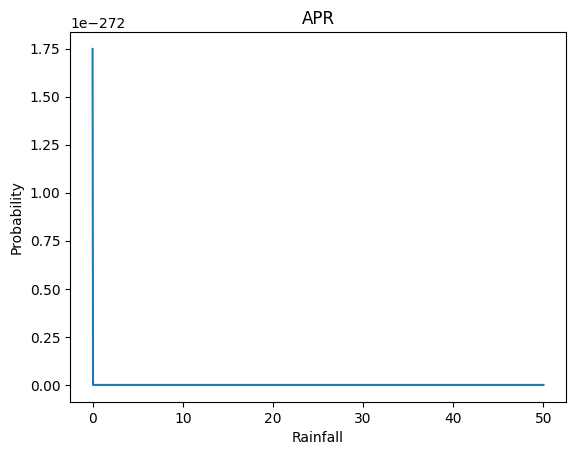

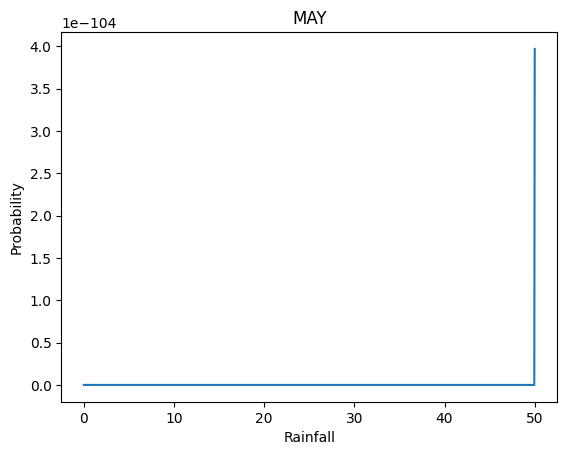

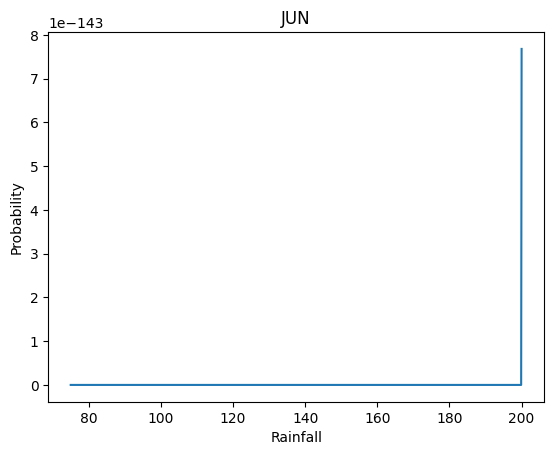

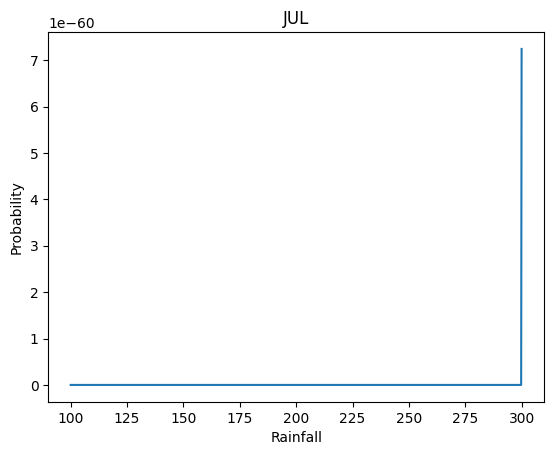

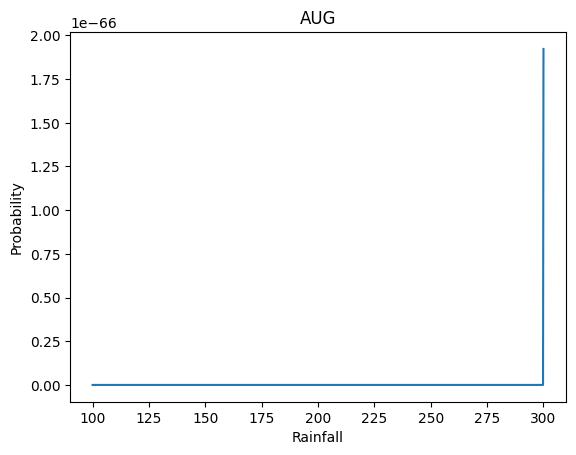

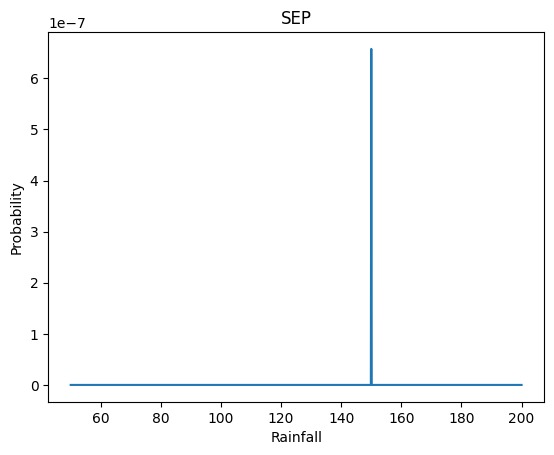

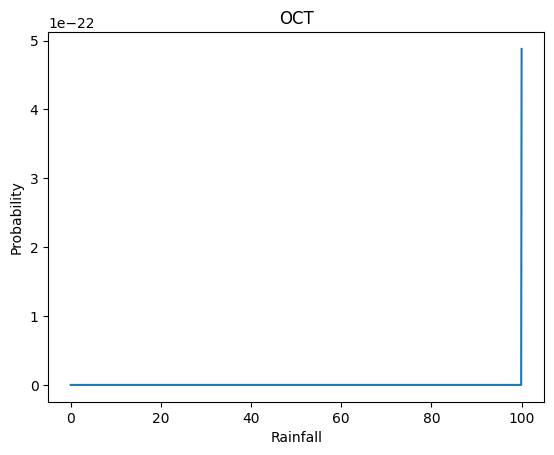

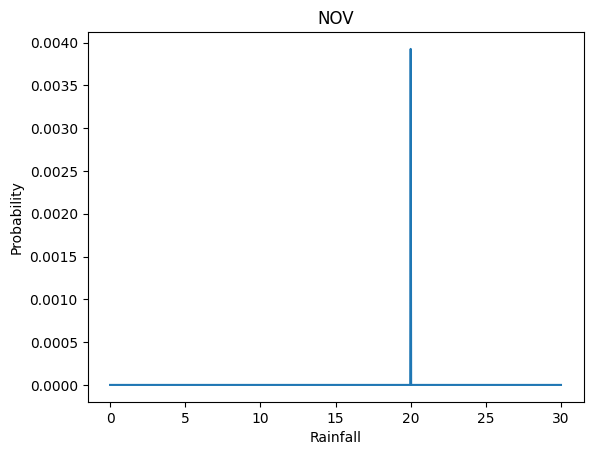

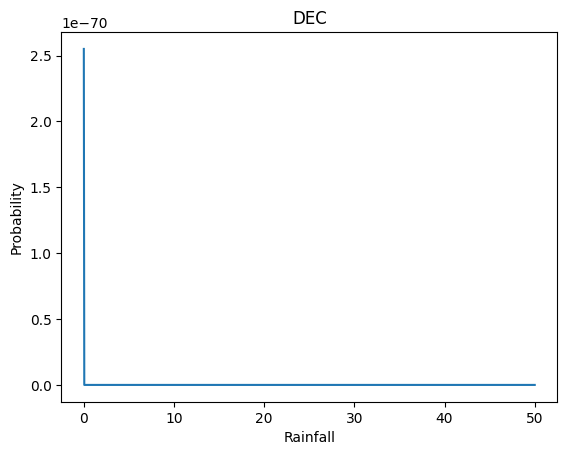

In [11]:
for i in range(1,13):
    plt.figure()
    plt.plot(np.linspace(start[i-1], end[i-1], 1000), n*stats.poisson.pmf(n*np.linspace(start[i-1], end[i-1], 1000), likelihood_data.iloc[:,i].sum()))
    plt.xlabel('Rainfall')
    plt.ylabel('Probability')
    plt.title(likelihood_data.columns[i])
    plt.show()
    #plt.savefig('../Project_2/likelihood_graphs/'+likelihood_data.columns[i]+'.png')
    #plt.close()

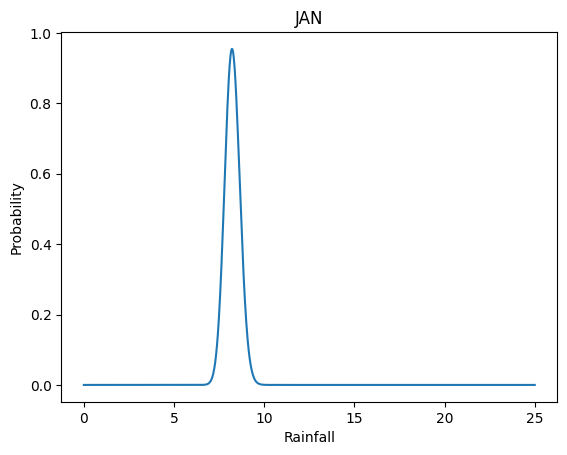

mean:  8.23814598190228
variance:  0.17501722103906078


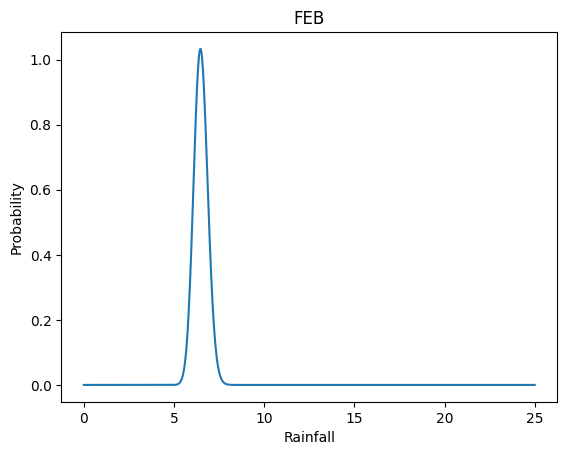

mean:  6.488346644090198
variance:  0.14953915995839304


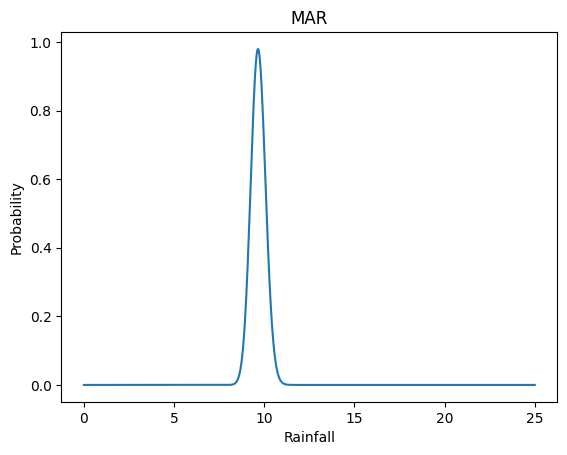

mean:  9.673937325989115
variance:  0.16595882872880846


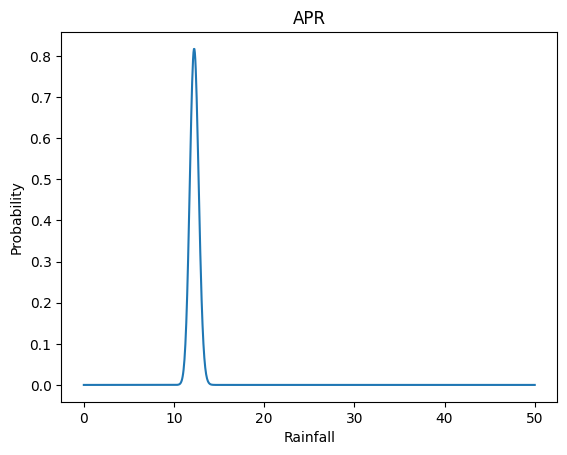

mean:  12.255283361850985
variance:  0.23824805721837633


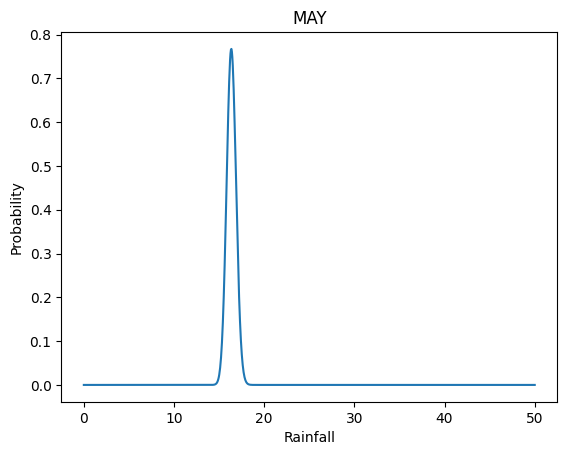

mean:  16.36742409800072
variance:  0.27037090998489827


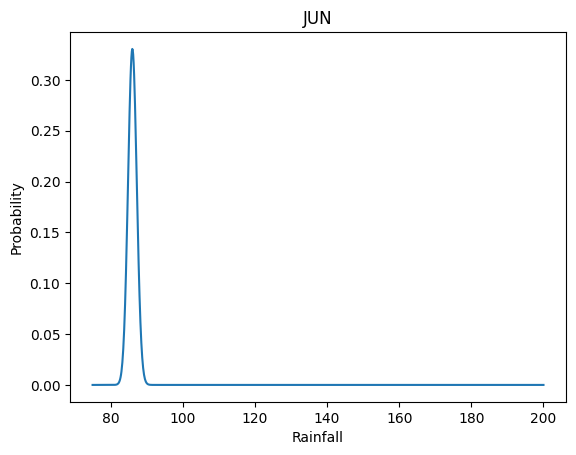

mean:  86.05103764882826
variance:  1.4567717592296316


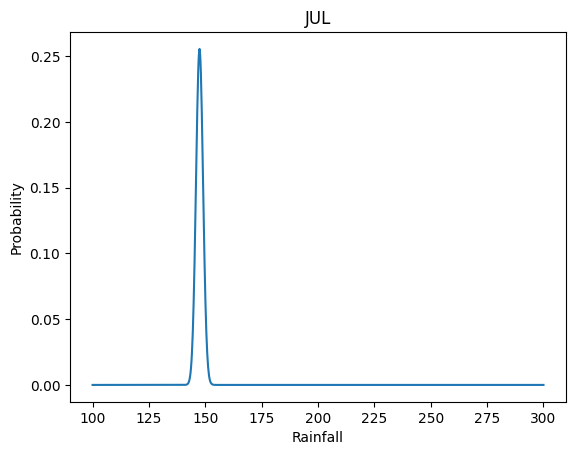

mean:  147.45134674062803
variance:  2.4369617528780734


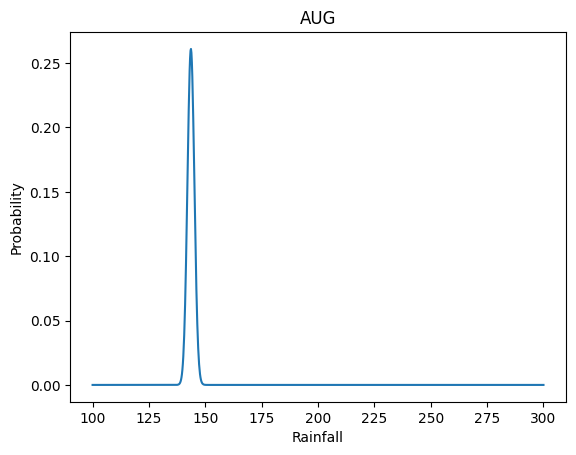

mean:  143.62436956411042
variance:  2.334469875378039


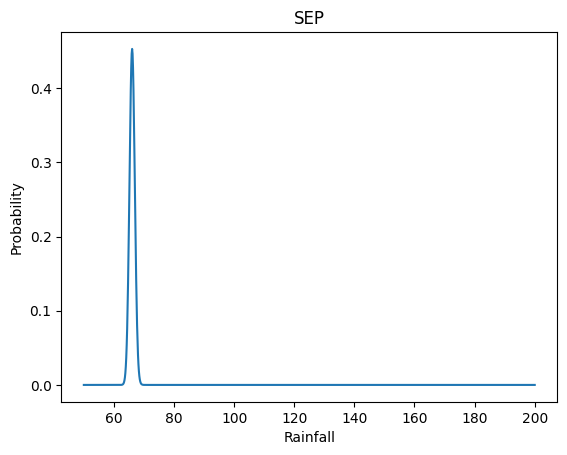

mean:  66.07795969654377
variance:  0.7762905404915383


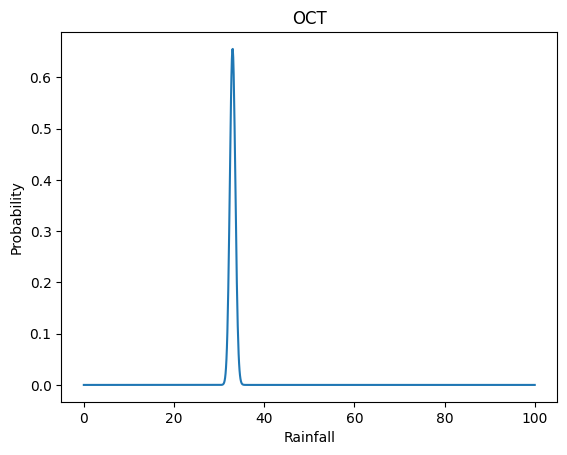

mean:  33.00029005492721
variance:  0.3685098005411241


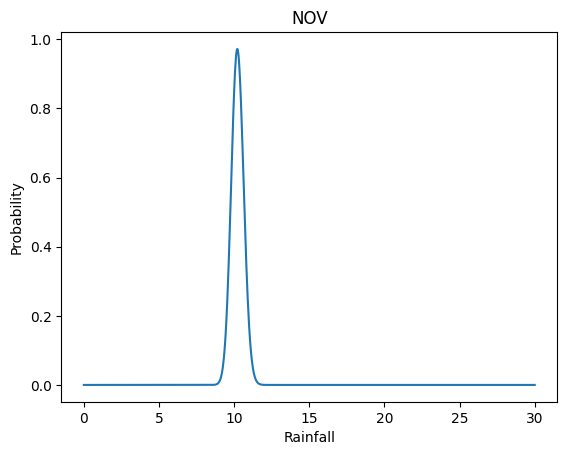

mean:  10.228651765053483
variance:  0.16853858264905594


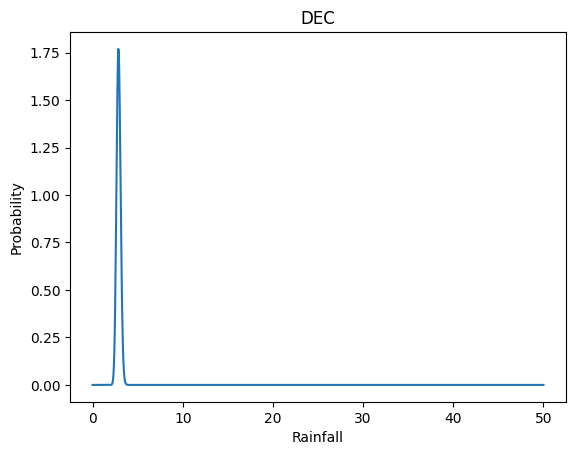

mean:  2.886903894166597
variance:  0.05084045784856888


In [12]:
# posterior distribution for each month
start = [0,0,0,0,0, 75, 100, 100, 50,0,0,0]
end = [25, 25, 25, 50, 50, 200, 300, 300, 200,100, 30, 50]

for i in range(1,13):
    plt.figure()
    # plt.hist(data.iloc[:,i], bins=20, density=True)
    plt.plot(np.linspace(start[i-1], end[i-1], 1000), stats.gamma.pdf(np.linspace(start[i-1], end[i-1], 1000), alpha[i-1]+ likelihood_data.iloc[:, i].sum(), scale=(1/(beta[i-1]+n))))
    plt.xlabel('Rainfall')
    plt.ylabel('Probability')
    plt.title(data.columns[i])
    plt.show()
    print("mean: ", stats.gamma.mean(alpha[i-1]+likelihood_data.iloc[:, i].sum(), scale = 1/(beta[i-1]+n)))
    print("variance: ", stats.gamma.std(alpha[i-1]+likelihood_data.iloc[:, i].sum(), scale = 1/(beta[i-1]+n))**2)
    #plt.savefig('../Project_2/posterior_graphs/'+data.columns[i]+'.png')
    #plt.close()
#printing alpha and beta values in a file
# f = open("../Project_2/posterior.txt", "w")
# for i in range(1,13):
#     f.write("alpha for month "+ str(data.columns[i]) +" is "+str(np.round(alpha[i-1]+l[i-1],2))+" and beta is "+str(np.round(beta[i-1]+35,2))+"\n")

# #calculating mean and standard deviation for each month
# f.write("The mean and standard deviation for each month are: \n")

# for i in range(1,13):
#     f.write("Month "+str(data.columns[i])+" : "+str(np.round(stats.gamma.mean(alpha[i-1]+likelihood_data.iloc[:, i].sum(), scale=1/(beta[i-1]+n)),2))+" and "+str(np.round(stats.gamma.std(alpha[i-1] + likelihood_data.iloc[:, i].sum(), scale=1/(beta[i-1]+35)),2))+" respectively \n")

# #95% confidence interval
# f.write("The 95% confidence interval for each month is: \n")

# for i in range(1,13):
#     f.write("Month "+str(data.columns[i])+" : "+str(np.round(stats.gamma.interval(0.95, alpha[i-1]+likelihood_data.iloc[:, i].sum(), scale=1/(beta[i-1]+n))[0],2))+" and "+str(np.round(stats.gamma.interval(0.95, alpha[i-1]+likelihood_data.iloc[:, i].sum(), scale=1/(beta[i-1]+n))[1],2))+" respectively \n")

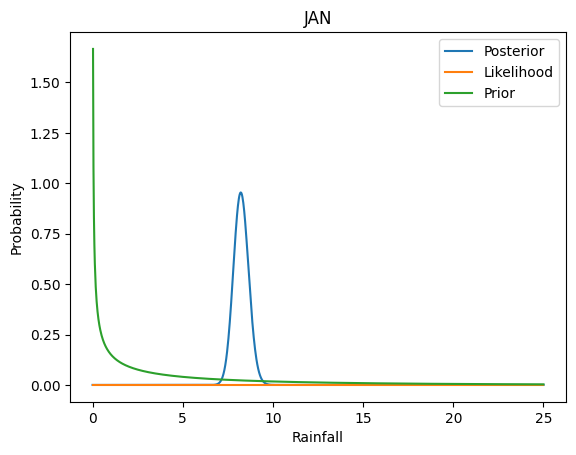

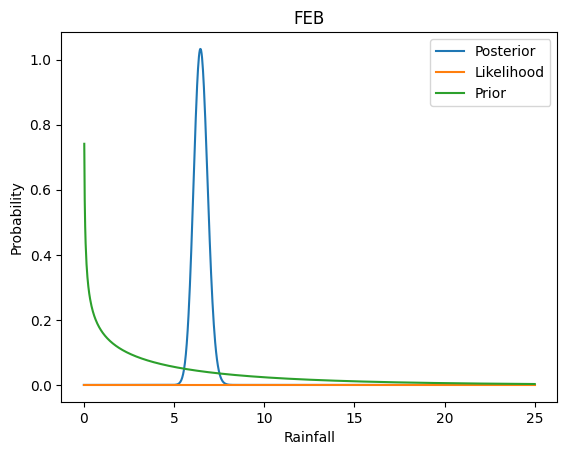

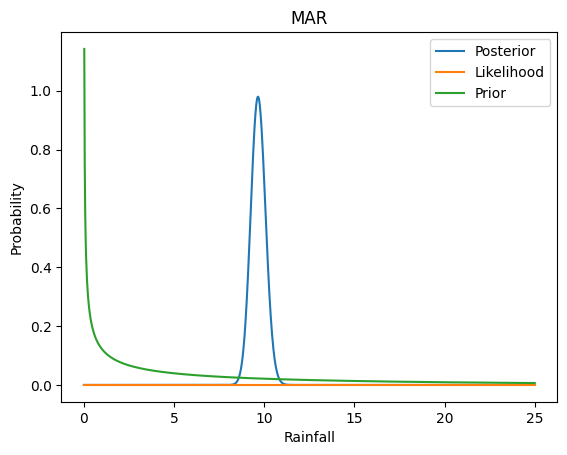

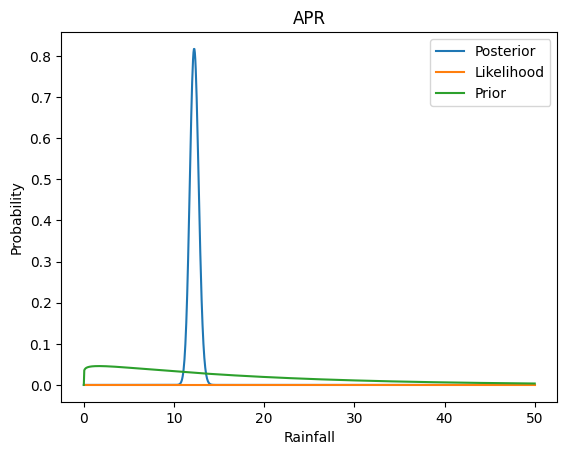

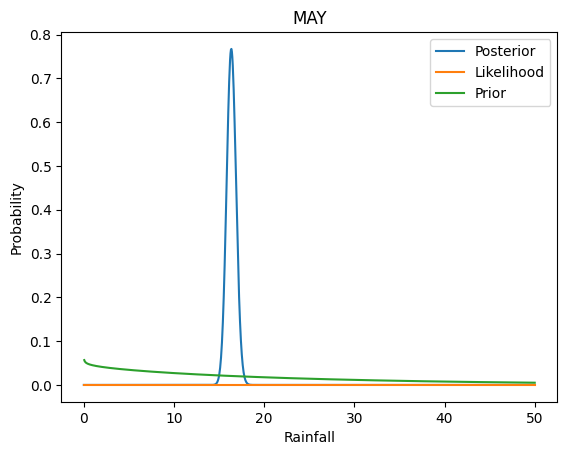

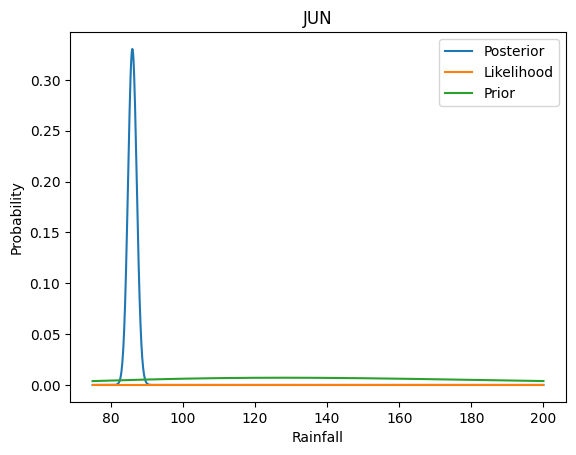

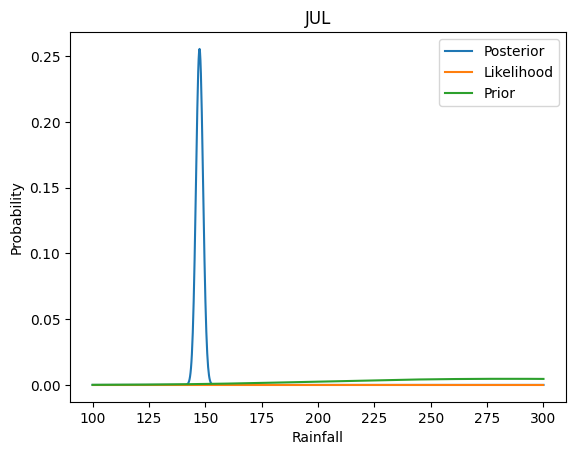

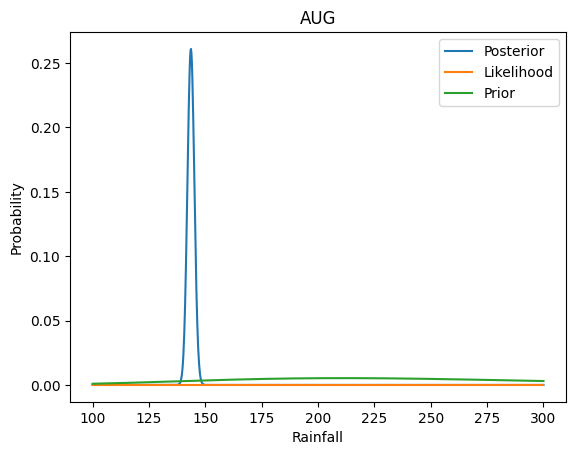

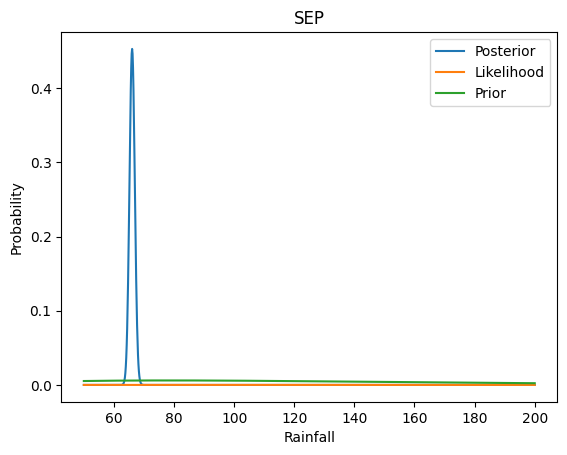

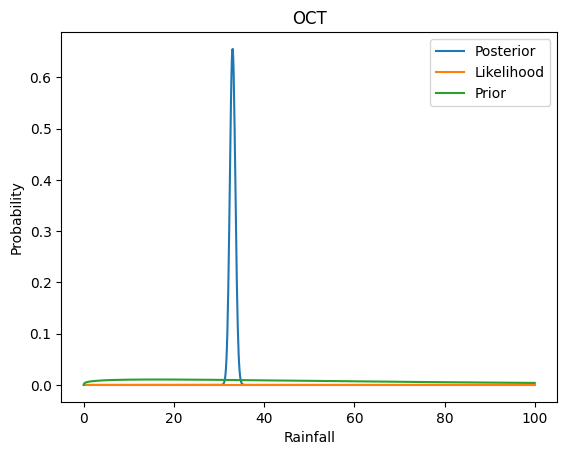

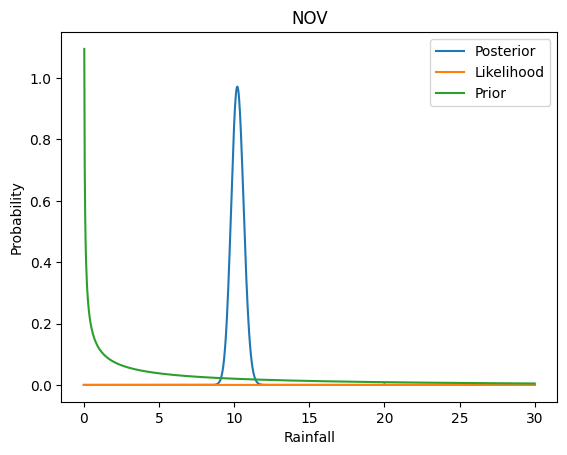

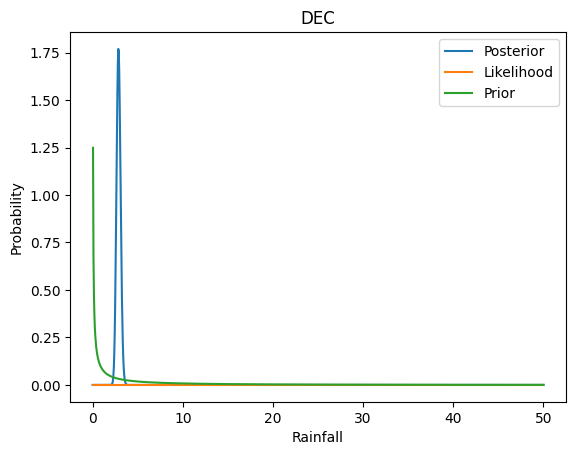

In [13]:
# poisson-gamma distribution for each month
start = [0,0,0,0,0, 75, 100, 100, 50,0,0,0]
end = [25, 25, 25, 50, 50, 200, 300, 300, 200,100, 30, 50]
for i in range(1,13):
    plt.figure()
    # plt.hist(data.iloc[:,i], bins=20, density=True)
    plt.plot(np.linspace(start[i-1], end[i-1], 1000), stats.gamma.pdf(np.linspace(start[i-1], end[i-1], 1000), alpha[i-1]+ likelihood_data.iloc[:, i].sum(), scale=(1/(beta[i-1]+n))))
    plt.plot(np.linspace(start[i-1], end[i-1], 1000), n*stats.poisson.pmf(n*np.linspace(start[i-1], end[i-1], 1000), likelihood_data.iloc[:,i].sum()))
    plt.plot(np.linspace(start[i-1], end[i-1], 1000), stats.gamma.pdf(np.linspace(start[i-1], end[i-1], 1000), alpha[i-1], scale=beta[i-1]))
    plt.xlabel('Rainfall')
    plt.ylabel('Probability')
    plt.title(data.columns[i])
    plt.legend(['Posterior', 'Likelihood', 'Prior'])
    #plt.savefig('../Project_2/gamma/{}.png'.format(data.columns[i]))
    #plt.close()
    plt.show()

    # print("Posterior max: ",np.argmax(stats.gamma.pdf(np.linspace(start[i-1], end[i-1], 1000), alpha[i-1]+ likelihood_data.iloc[:, i].sum(), scale=(1/(beta[i-1]+n)))))
    # print("likelihood max: ",np.argmax(n*stats.poisson.pmf(n*np.linspace(start[i-1], end[i-1], 1000), likelihood_data.iloc[:,i].sum())))
    # print("Prior max: ", np.argmax(stats.gamma.pdf(np.linspace(start[i-1], end[i-1], 1000), alpha[i-1], scale=beta[i-1])))

    #printing the posterior mean into a file for each month
    # with open('../Project_2/temp.txt', 'a') as f:
    #     f.write("{}:{}\n".format(data.columns[i], np.round(stats.gamma.mean(alpha[i-1]+ likelihood_data.iloc[:, i].sum(), scale=(1/(beta[i-1]+n))), 2)))
    

    # print("Posterior mean: ",stats.gamma.mean(alpha[i-1]+ likelihood_data.iloc[:, i].sum(), scale=((beta[i-1]+n))))
